In [13]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv('reviews.csv')
df

,review,date,rating,country
0,Not Verified | Singapore to Heathrow. Busine...,2024-07-16,1.0,New Zealand
1,Not Verified | I reported my damaged/ruined ...,2024-07-15,1.0,United Kingdom
2,"Not Verified | On March 1st, I flew from Ber...",2024-07-09,1.0,Germany
3,Not Verified | The WORST customer experience! ...,2024-07-05,1.0,United Kingdom
4,Not Verified | Had to cancel my flight month...,2024-07-01,1.0,Canada
...,...,...,...,...
3855,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,2014-05-18,2.0,United Kingdom
3856,LHR-JTR-LHR. A tale of opposites for BA's new ...,2014-05-18,6.0,United Kingdom
3857,Gatwick-Venice return. Two contrasting experie...,2014-05-18,7.0,United Kingdom
3858,1st Class LHR-PHX. Totally seamless flight. Gr...,2014-05-18,10.0,United Kingdom


In [3]:
import nltk
from nltk.stem.porter import PorterStemmer
import re
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to apply VADER sentiment analysis
def get_sentiment(text):
    sentiment_score = analyzer.polarity_scores(text)
    return sentiment_score['compound']  # Compound score reflects the overall sentiment

# Apply sentiment analysis
df['sentiment_score'] = df['review'].apply(get_sentiment)

# Classify sentiment based on compound score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))

df[['review', 'rating', 'sentiment', 'sentiment_score']]


,review,rating,sentiment,sentiment_score
0,Not Verified | Singapore to Heathrow. Busine...,1.0,Negative,-0.2040
1,Not Verified | I reported my damaged/ruined ...,1.0,Negative,-0.7147
2,"Not Verified | On March 1st, I flew from Ber...",1.0,Negative,-0.9757
3,Not Verified | The WORST customer experience! ...,1.0,Negative,-0.9632
4,Not Verified | Had to cancel my flight month...,1.0,Negative,-0.6369
...,...,...,...,...
3855,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,2.0,Negative,-0.9845
3856,LHR-JTR-LHR. A tale of opposites for BA's new ...,6.0,Negative,-0.7441
3857,Gatwick-Venice return. Two contrasting experie...,7.0,Positive,0.9830
3858,1st Class LHR-PHX. Totally seamless flight. Gr...,10.0,Positive,0.9731


In [5]:
# Count the number of negative sentiments by filtering
negative_count = df[df['sentiment'] == 'Negative'].shape[0]
positive_count=df[df['sentiment']=='Positive'].shape[0]
print(f"Number of Negative Sentiments: {negative_count}")
print(f"Number of Negative Sentiments: {positive_count}")

Number of Negative Sentiments: 1617
Number of Negative Sentiments: 2197


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

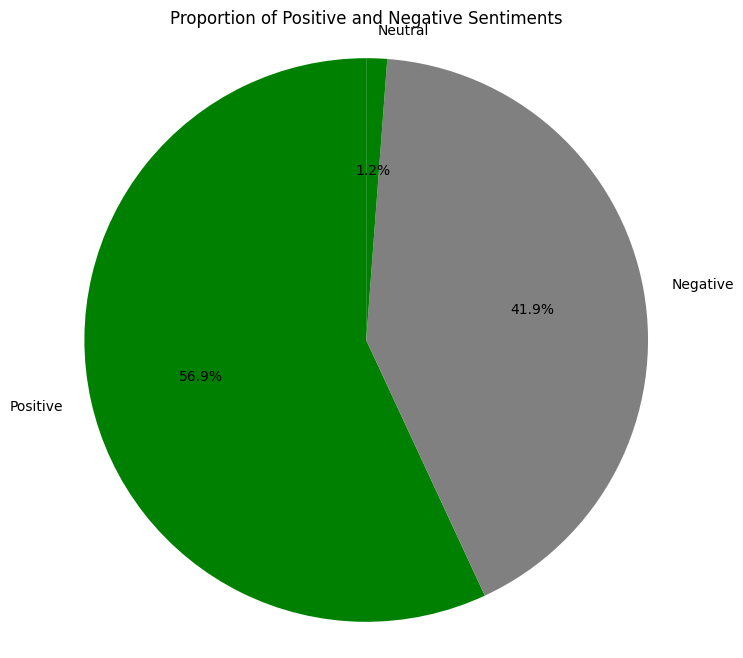

In [7]:
# Create a pie chart
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'grey'])
plt.title('Proportion of Positive and Negative Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


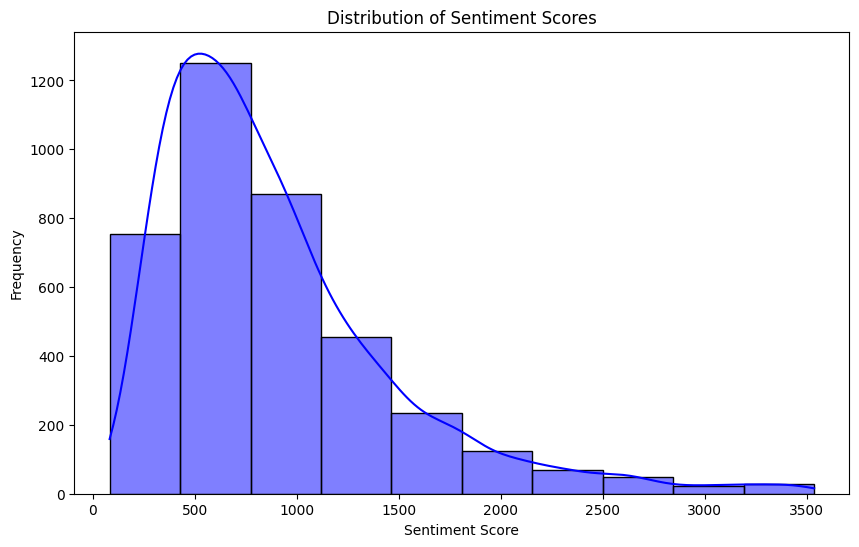

In [8]:
df['sentiment_score'] = df['review'].apply(lambda reviews: len(reviews)) 

plt.figure(figsize=(10,6))
sns.histplot(df['sentiment_score'], bins=10, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

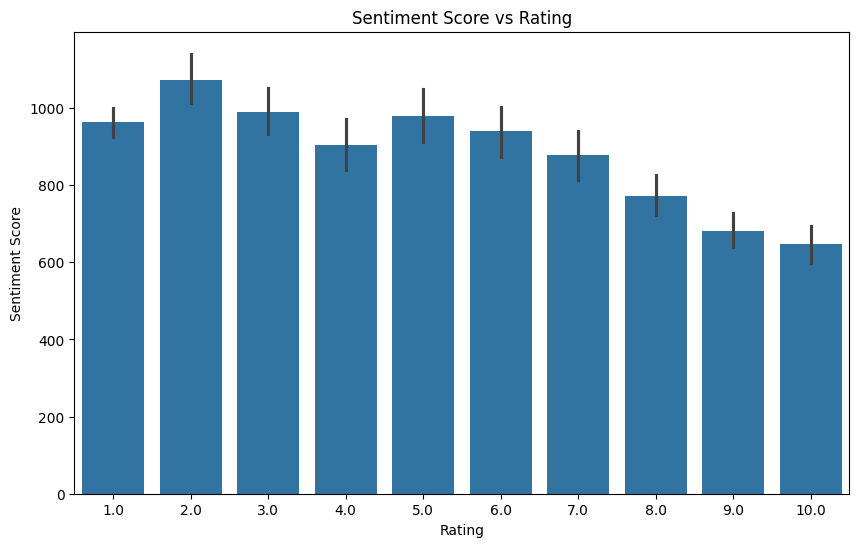

In [9]:
# Plotting sentiment score vs rating
plt.figure(figsize=(10,6))
sns.barplot(x='rating', y='sentiment_score', data=df)
plt.title('Sentiment Score vs Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment Score')
plt.show()


In [10]:
# Define a function to categorize ratings
def rating_category(rating):
    return 'Positive' if rating >= 5.0 else 'Negative'

df['actual_sentiment'] = df['rating'].apply(rating_category)

# Compare predicted sentiment to actual sentiment from ratings
df['correct'] = df['sentiment'] == df['actual_sentiment']

# Calculate accuracy
accuracy = df['correct'].mean()
print(f"Model Accuracy: {accuracy:.2%}")


Model Accuracy: 77.46%


In [24]:
# Filter out 'Neutral' from the predicted sentiment
filtered_sentiment = df['sentiment'][df['sentiment'].isin(['Positive', 'Negative'])]


In [25]:
import pandas as pd
from sklearn.metrics import classification_report

# Create a mask for valid sentiment predictions
mask = df['sentiment'].isin(['Positive', 'Negative'])

# Filter both actual and predicted sentiments using the mask
filtered_actual = df['actual_sentiment'][mask]
filtered_predicted = df['sentiment'][mask]

# Now both filtered_actual and filtered_predicted should have the same length
# Generate the classification report
print(classification_report(filtered_actual, filtered_predicted, zero_division=0))


              precision    recall  f1-score   support

    Negative       0.87      0.70      0.77      2031
    Positive       0.72      0.89      0.79      1783

    accuracy                           0.78      3814
   macro avg       0.80      0.79      0.78      3814
weighted avg       0.80      0.78      0.78      3814



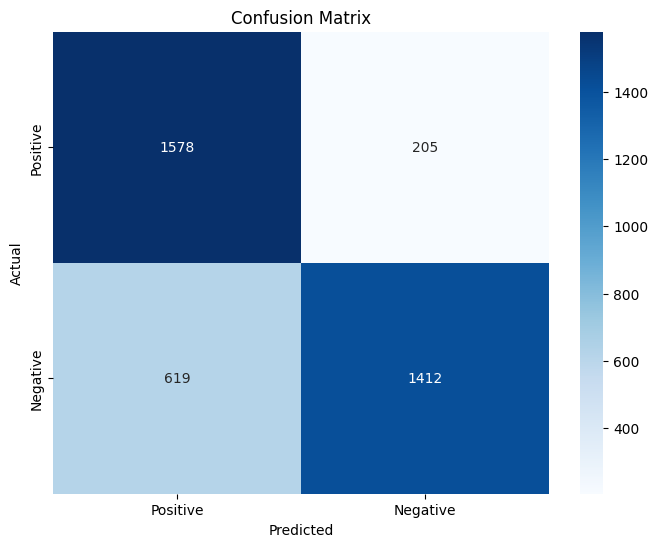

In [23]:
from sklearn.metrics import confusion_matrix
# Generate the confusion matrix
cm = confusion_matrix(filtered_actual, filtered_predicted, labels=['Positive', 'Negative'])

# Create a heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Positive', 'Negative'], 
                yticklabels=['Positive', 'Negative'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


In [27]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression

In [42]:

# Feature Engineering: Create 'review_length' and 'sentiment_score'
# Assuming 'review_text' is a column in your DataFrame
df['review_length'] = df['review'].apply(len)  # Length of the review text
df['sentiment_score'] = df['rating'] / 5.0  # Normalized sentiment score


# Feature selection - include all relevant features
X = df[['review_length', 'sentiment_score']]  # Ensure these columns exist
y = df['actual_sentiment']

# Split the data into training and test sets (optional but recommended)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can proceed with SMOTE or other analysis


In [44]:
# Check for missing values in the DataFrame
print("Missing values in each column:\n", df.isnull().sum())

# Handle missing values
# Option 1: Drop rows with any missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values, for example with the mean for numerical columns
# df['some_column'].fillna(df['some_column'].mean(), inplace=True)

# Re-define X and y after handling missing values
X = df_cleaned[['review_length', 'sentiment_score']]  # Adjust based on your feature engineering
y = df_cleaned['actual_sentiment']

# Now you can apply SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f'Original dataset shape: {Counter(y)}')
print(f'Resampled dataset shape: {Counter(y_resampled)}')


Missing values in each column:
 review              0
date                0
rating              4
country             2
sentiment_score     4
sentiment           0
actual_sentiment    0
correct             0
review_length       0
dtype: int64
Original dataset shape: Counter({'Negative': 2056, 'Positive': 1798})
Resampled dataset shape: Counter({'Negative': 2056, 'Positive': 2056})


In [46]:
# Assuming review_text is a column in your DataFrame
df['review_length'] = df['review'].apply(len)
df['sentiment_score'] = df['rating'].apply(lambda x: x / 5.0)  # Example for sentiment score


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score

# Create a RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='f1_weighted', n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)

# Best parameters and score
print(f'Best parameters: {grid_search.best_params_}')
print(f'Best score: {grid_search.best_score_:.4f}')

# Cross-validation on resampled data
best_rf = grid_search.best_estimator_
cv_scores = cross_val_score(best_rf, X_resampled, y_resampled, cv=5, scoring='f1_weighted')
print(f'Cross-Validation F1 Scores: {cv_scores}')
print(f'Mean F1 Score: {cv_scores.mean():.4f}')


Best parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best score: 1.0000
Cross-Validation F1 Scores: [1. 1. 1. 1. 1.]
Mean F1 Score: 1.0000


In [36]:
y_test_pred = best_rf.predict(X_test)  # Assuming X_test is your test data
print(classification_report(y_test, y_test_pred))  # Replace y_test with your actual test labels


              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00       410
    Positive       1.00      1.00      1.00       362

    accuracy                           1.00       772
   macro avg       1.00      1.00      1.00       772
weighted avg       1.00      1.00      1.00       772



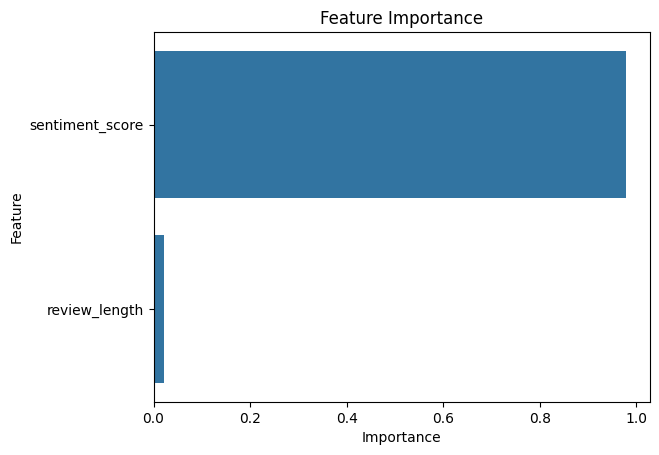

In [37]:
feature_importances = best_rf.feature_importances_
feature_names = X_resampled.columns  # Adjust this if X_resampled is a numpy array
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()
